# Energy Consumption Forecasting using LSTM

This project builds a deep learning model using LSTM networks to forecast future energy consumption based on historical time-series data.

### Problem Statement

The objective of this project is to forecast the next 24 hours of household energy consumption using the past 72 hours of historical data.

## 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading

In [2]:
df = pd.read_csv(
    "../data/household_power_consumption.txt",
    sep=';',
    low_memory=False
)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## 3. Data Cleaning and Preprocessing

In [5]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('datetime', inplace=True)

C:\Users\ashifa\AppData\Local\Temp\ipykernel_9232\1604646956.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [6]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:
df.drop(columns=['Date', 'Time'], inplace=True)

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [10]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

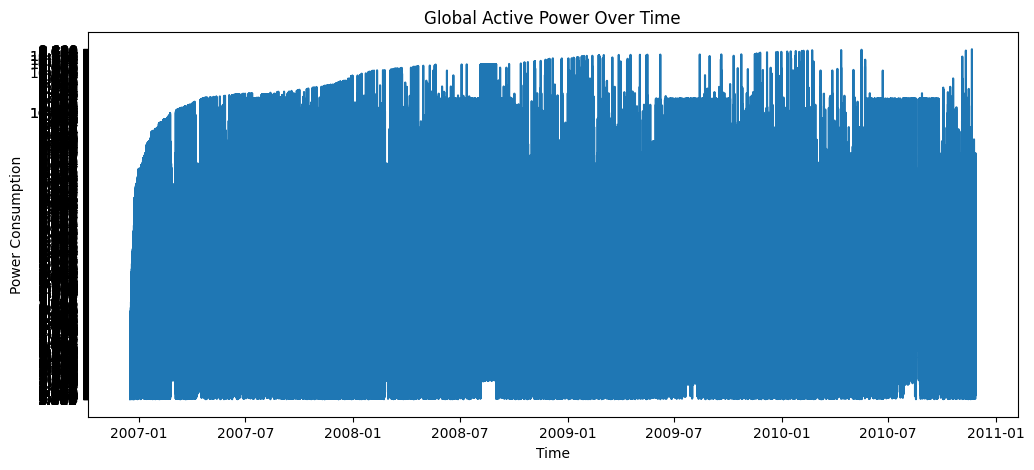

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df['Global_active_power'])
plt.title("Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.show()


In [14]:
df = df.apply(pd.to_numeric, errors='coerce')

In [15]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


## 4. Time Resampling (Minute to Hourly Aggregation)

In [18]:
df_hourly = df.resample('h').mean()

In [19]:
df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [20]:
print("Original shape:", df.shape)
print("Hourly shape:", df_hourly.shape)

Original shape: (2049280, 7)
Hourly shape: (34589, 7)


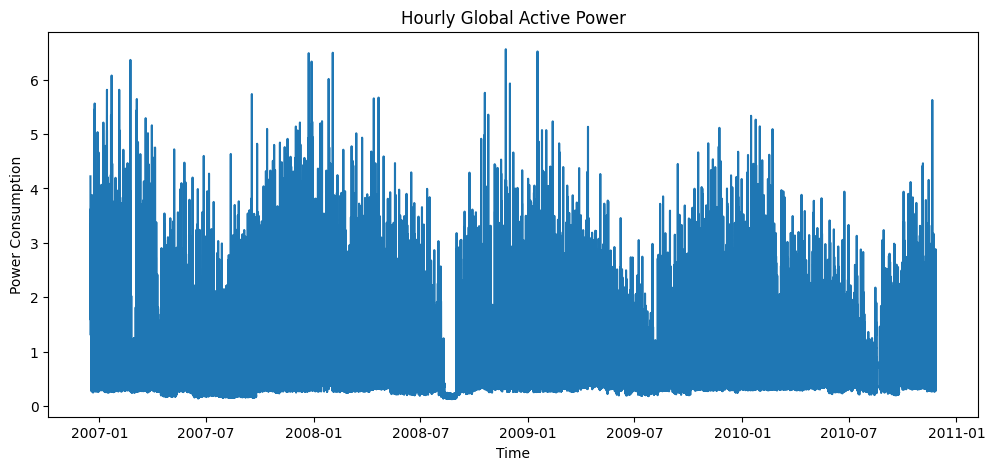

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df_hourly['Global_active_power'])
plt.title("Hourly Global Active Power")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.show()

In [22]:
df_hourly.isnull().sum()

Global_active_power      421
Global_reactive_power    421
Voltage                  421
Global_intensity         421
Sub_metering_1           421
Sub_metering_2           421
Sub_metering_3           421
dtype: int64

In [23]:
df_hourly.dropna(inplace=True)

In [24]:
df_hourly.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [25]:
df_hourly['hour'] = df_hourly.index.hour

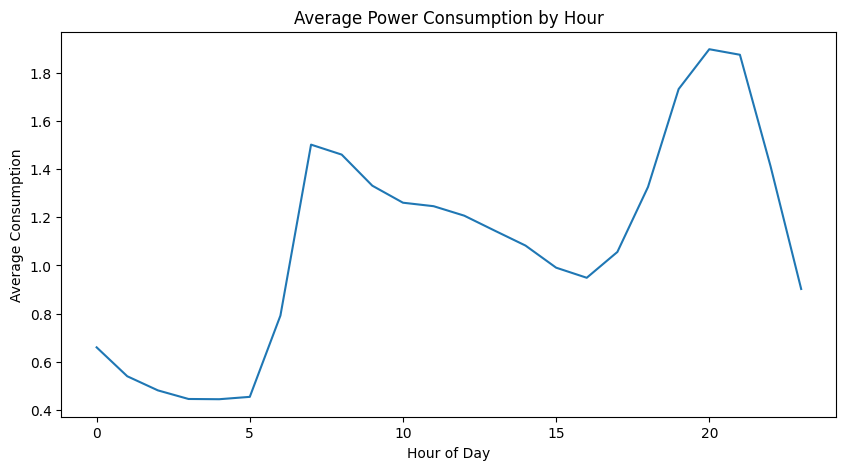

In [26]:
hourly_pattern = df_hourly.groupby('hour')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
hourly_pattern.plot()
plt.title("Average Power Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Consumption")
plt.show()

### Average power consumption by hour(Observations)

Energy consumption shows strong hourly seasonality with peak usage during evening hours and minimum usage during early morning hours.

## 5. Exploratory Data Analysis (EDA)

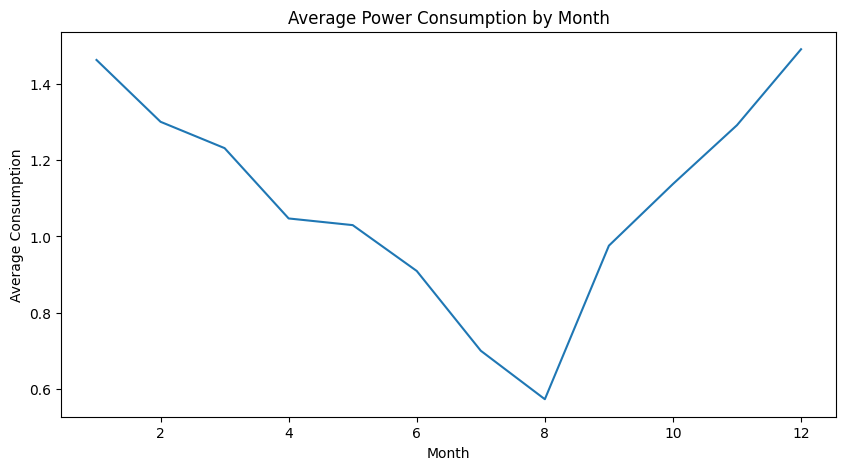

In [27]:
df_hourly['month'] = df_hourly.index.month

monthly_pattern = df_hourly.groupby('month')['Global_active_power'].mean()

plt.figure(figsize=(10,5))
monthly_pattern.plot()
plt.title("Average Power Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Consumption")
plt.show()

### Average power consumption by month(Observations)

- Higher consumption in winter months (start and end of year)
- Lower consumption around mid-year
- The data also contains long-term seasonal patterns

## 6. Feature Engineering

In [57]:
# We now add temporal features.
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month

In [58]:
df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,month,day_of_week
datetime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,12,5
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,12,5
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,12,5
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,12,5
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,12,5


A 72-hour input window and 24-hour forecast horizon were selected as a reasonable baseline for capturing short-term temporal dependencies in energy consumption patterns.

## 7. Sequence Creation Using Sliding Window

In [59]:
PAST_HOURS = 72
FUTURE_HOURS = 24

In [60]:
features = df_hourly.columns
target = 'Global_active_power'

In [61]:
data = df_hourly.values

In [62]:
X = []
y = []

for i in range(len(data) - PAST_HOURS - FUTURE_HOURS):
    
    # past 72 hours as input
    X.append(data[i : i + PAST_HOURS])
    
    # next 24 hours of target as output
    y.append(data[i + PAST_HOURS : i + PAST_HOURS + FUTURE_HOURS, 0])

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (34072, 72, 10)
y shape: (34072, 24)


## 8. Chronological Train-Validation-Test Split

In [65]:
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

In [66]:
print(X_train.shape, X_val.shape, X_test.shape)

(23850, 72, 10) (5110, 72, 10) (5112, 72, 10)


## 9. Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])
X_train_scaled = scaler.fit_transform(X_train_reshaped)

In [70]:
X_train_scaled = X_train_scaled.reshape(X_train.shape)

In [71]:
X_val_scaled = scaler.transform(
    X_val.reshape(-1, X_val.shape[2])
).reshape(X_val.shape)

X_test_scaled = scaler.transform(
    X_test.reshape(-1, X_test.shape[2])
).reshape(X_test.shape)

## 10. LSTM Model Architecture

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [73]:
model = Sequential()

model.add(LSTM(64, return_sequences=False,
               input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.2))

model.add(Dense(FUTURE_HOURS))

model.compile(optimizer='adam', loss='mse')

c:\Users\ashifa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,760 (81.09 KB)

 Trainable params: 20,760 (81.09 KB)

 Non-trainable params: 0 (0.00 B)

## 11. Model Training

In [75]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)

Epoch 1/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - loss: 0.7662 - val_loss: 0.5551
Epoch 2/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - loss: 0.5866 - val_loss: 0.5215
Epoch 3/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - loss: 0.5573 - val_loss: 0.4984
Epoch 4/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - loss: 0.5343 - val_loss: 0.4818
Epoch 5/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - loss: 0.5164 - val_loss: 0.4877
Epoch 6/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - loss: 0.5023 - val_loss: 0.4849
Epoch 7/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - loss: 0.4883 - val_loss: 0.4990
Epoch 8/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - loss: 0.4768 - val_loss: 0.4923
Epoch 9/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 0.4644 - val_loss: 0.4870
Epoch 10/10
746/746 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - loss: 0.4514 - val_loss: 0.5143


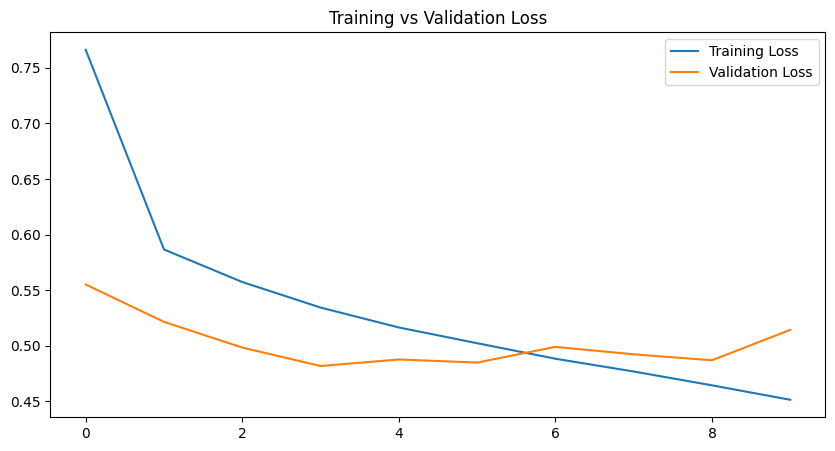

In [76]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [77]:
y_pred = model.predict(X_test_scaled)

160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


In [78]:
y_pred.shape

(5112, 24)

In [79]:
print(y_pred.shape, y_test.shape)


(5112, 24) (5112, 24)


In [80]:
y_pred_rescaled = []
y_test_rescaled = []

for i in range(len(y_pred)):
    temp_pred = np.zeros((FUTURE_HOURS, X_test.shape[2]))
    temp_true = np.zeros((FUTURE_HOURS, X_test.shape[2]))
    
    temp_pred[:, 0] = y_pred[i]
    temp_true[:, 0] = y_test[i]
    
    temp_pred = scaler.inverse_transform(temp_pred)
    temp_true = scaler.inverse_transform(temp_true)
    
    y_pred_rescaled.append(temp_pred[:, 0])
    y_test_rescaled.append(temp_true[:, 0])

y_pred_rescaled = np.array(y_pred_rescaled)
y_test_rescaled = np.array(y_test_rescaled)

## 12. Model Evaluation

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
y_pred_flat = y_pred_rescaled.flatten()
y_test_flat = y_test_rescaled.flatten()

In [83]:
mae = mean_absolute_error(y_test_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred_flat))
mape = np.mean(np.abs((y_test_flat - y_pred_flat) / y_test_flat)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 2.80587651390828
RMSE: 3.825315306714062
MAPE: 58.96803739060557


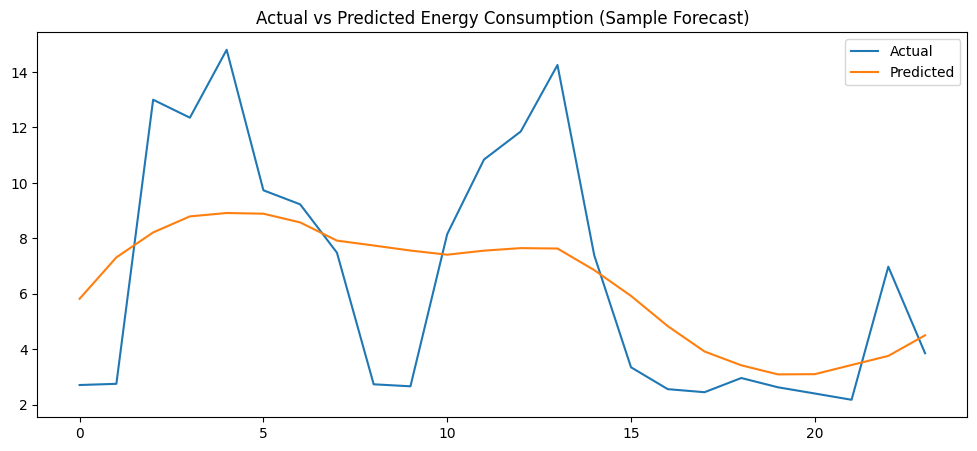

In [84]:
plt.figure(figsize=(12,5))
plt.plot(y_test_rescaled[0], label="Actual")
plt.plot(y_pred_rescaled[0], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Energy Consumption (Sample Forecast)")
plt.show()

## 13. Residual Analysis

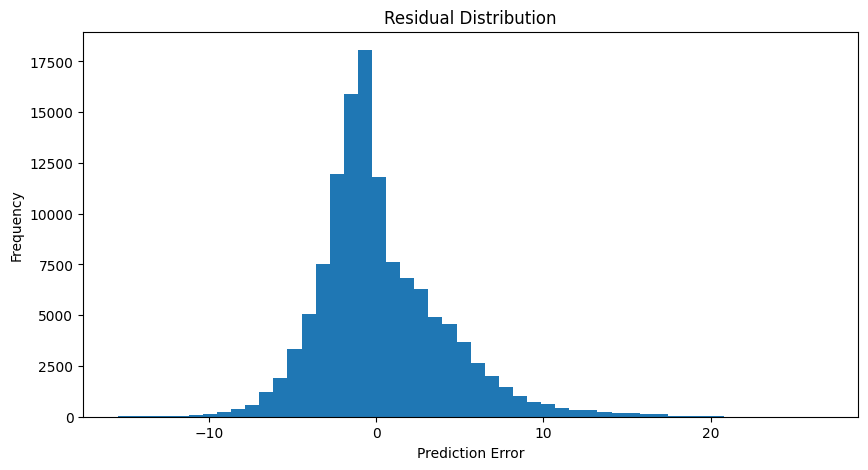

In [85]:
residuals = y_test_flat - y_pred_flat

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

## 14. Conclusion

The LSTM-based forecasting model was successfully implemented to predict future energy consumption using historical time-series data. The model captured daily and seasonal patterns effectively, as observed in the actual vs predicted comparison.

Although the model performed reasonably well in capturing general trends, it struggled with sharp consumption spikes, resulting in moderate MAE and RMSE values. The residual distribution indicates that prediction errors are approximately centered around zero, suggesting no significant systematic bias.

Future improvements may include:

- Increasing model depth
- Using stacked LSTM layers
- Adding more lag features
- Hyperparameter tuning
- Experimenting with longer historical windows

Overall, this implementation demonstrates a complete end-to-end deep learning forecasting pipeline.